<a href="https://colab.research.google.com/github/brito-bernardo/osmnx/blob/main/QuantityIntersections.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install osmnx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.4/102.4 kB 2.5 MB/s eta 0:00:00


In [2]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
place_name = "Porto, Portugal"

In [4]:
G = ox.graph_from_place(place_name, network_type = 'drive')

In [5]:
intersections = ox.graph_to_gdfs(G, nodes=True, edges=False)

In [7]:
intersections_2 = intersections[intersections.index.isin([node for node, degree in dict(G.degree()).items() if degree == 2])]
intersections_3 = intersections[intersections.index.isin([node for node, degree in dict(G.degree()).items() if degree == 3])]
intersections_4 = intersections[intersections.index.isin([node for node, degree in dict(G.degree()).items() if degree == 4])]
intersections_5_plus = intersections[intersections.index.isin([node for node, degree in dict(G.degree()).items() if degree >= 5])]

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


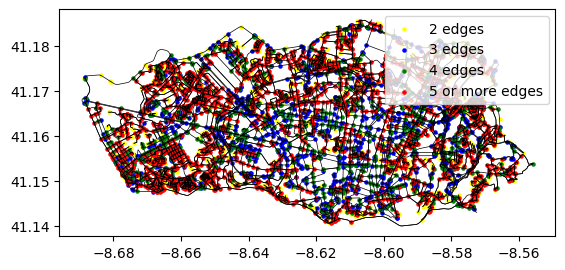

Intersections with 2 edges: 663
Intersections with 3 edges: 1305
Intersetions with 4 edges: 976
Intersections with 5 or more edges: 2061


In [12]:
fig, ax = plt.subplots()

for _, edge in ox.graph_to_gdfs(G, nodes=False, edges=True).iterrows():
    line = edge.geometry
    x, y = line.xy
    ax.plot(x, y, color="black", linewidth=0.5)

intersections_2.plot(ax=ax, color='yellow', markersize=5, label='2 edges')
intersections_3.plot(ax=ax, color='blue', markersize=5, label='3 edges')
intersections_4.plot(ax=ax, color='green', markersize=5, label='4 edges')
intersections_5_plus.plot(ax=ax, color='red', markersize=5, label='5 or more edges')

plt.legend()

plt.show()

print(f"Intersections with 2 edges: {len(intersections_2)}")
print(f"Intersections with 3 edges: {len(intersections_3)}")
print(f"Intersetions with 4 edges: {len(intersections_4)}")
print(f"Intersections with 5 or more edges: {len(intersections_5_plus)}")